In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gdp = pd.read_csv('data/gdp.csv')
inflation = pd.read_csv('data/inflation.csv')
unemployment = pd.read_csv('data/unemployment.csv')
yield_data = pd.read_csv('data/yield.csv') 
yield_data['Date'] = pd.to_datetime(yield_data['Date'], errors='coerce')
yield_data.set_index('Date', inplace=True)


### Yield curves

In [61]:
yield_data = pd.read_csv("data/yield.csv")


# Convert to datetime and set as index
yield_data['Date'] = pd.to_datetime(yield_data['Date'])
yield_data.set_index('Date', inplace=True)


# Replace invalid values with NaN
yield_data.replace(-999.99, pd.NA, inplace=True)

# Drop columns with more than 20% missing values
threshold = 0.2 * len(yield_data)
columns_to_drop = yield_data.columns[yield_data.isnull().sum() > threshold]
yield_data_drop = yield_data.drop(columns=columns_to_drop)

# Rename columns
column_rename_mapping = {
    'BETA0': 'LongTermRate',    # Reflects investor confidence about long-term economic growth and inflation
    'BETA1': 'Slope',           # A negative slope (yield curve inversion) signals a possible recession
}


# https://www.federalreserve.gov/pubs/feds/2006/200628/200628pap.pdf   <=== labels for the columns plus info on data
for i in range(1, 30):
    column_rename_mapping[f'SVENY{i:02d}'] = f'ZeroCouponYield{i}Y'
    column_rename_mapping[f'SVENF{i:02d}'] = f'InstantaneousForwardRate{i}Y'
    yield_data = yield_data.drop(columns=f'SVENPY{i:02d}')
yield_data.rename(columns=column_rename_mapping, inplace=True)


# Resample to monthly frequency (convert from 'B' to 'M')
yield_data = yield_data.resample('M').mean()

# Interpolate missing values 
yield_data.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)


columns_of_interest = ['Slope', 'LongTermRate'] + \
                      [f'ZeroCouponYield{i}Y' for i in range(1, 11)] + \
                      [f'InstantaneousForwardRate{i}Y' for i in range(1, 11)]


new_yield_data = yield_data[columns_of_interest]
new_yield_data.drop(columns=["InstantaneousForwardRate8Y",'InstantaneousForwardRate9Y','ZeroCouponYield8Y', 'ZeroCouponYield9Y' ])


C:\Users\devpa\AppData\Local\Temp\ipykernel_74480\2859740873.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yield_data = yield_data.resample('M').mean()
C:\Users\devpa\AppData\Local\Temp\ipykernel_74480\2859740873.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  yield_data.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)


,Slope,LongTermRate,ZeroCouponYield1Y,ZeroCouponYield2Y,ZeroCouponYield3Y,ZeroCouponYield4Y,ZeroCouponYield5Y,ZeroCouponYield6Y,ZeroCouponYield7Y,ZeroCouponYield10Y,InstantaneousForwardRate1Y,InstantaneousForwardRate2Y,InstantaneousForwardRate3Y,InstantaneousForwardRate4Y,InstantaneousForwardRate5Y,InstantaneousForwardRate6Y,InstantaneousForwardRate7Y,InstantaneousForwardRate10Y
Date,,,,,,,,,,,,,,,,,,
1961-06-30,-1.268221,4.002757,2.974685,3.383562,3.580031,3.684631,3.748146,3.790554,3.820877,NaN,3.533592,3.934585,3.993169,4.001369,4.002562,4.002731,4.002762,NaN
1961-07-31,-1.967420,4.100839,2.841955,3.289770,3.531040,3.668470,3.754025,3.811640,3.852910,NaN,3.436640,3.934995,4.062475,4.092050,4.098790,4.100355,4.100720,NaN
1961-08-31,-1.712356,4.248369,3.001652,3.420465,3.661852,3.802339,3.890426,3.949861,3.992443,NaN,3.522839,4.054435,4.201822,4.237530,4.245861,4.247778,4.248226,NaN
1961-09-30,-1.691689,4.130283,3.043195,3.445030,3.654595,3.770960,3.842475,3.890400,3.924650,NaN,3.581385,4.014040,4.108765,4.126550,4.129645,4.130185,4.130270,NaN
1961-10-31,-1.607382,3.815504,2.962929,3.350962,3.559624,3.674895,3.739548,3.776095,3.796800,NaN,3.489457,3.907943,4.016624,4.014843,3.979167,3.938957,3.904257,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,3.155800,2.384022,4.843450,4.459173,4.254350,4.154305,4.116082,4.114377,4.134009,4.243741,4.332027,3.902305,3.824605,3.899205,4.032232,4.179814,4.321741,4.651005
2024-08-31,1.158210,4.366392,4.378077,3.932977,3.759623,3.699645,3.691705,3.710009,3.742368,3.870782,3.692477,3.394745,3.455164,3.588405,3.731395,3.870400,4.000941,4.320395
2024-09-30,0.838962,4.658334,3.991825,3.590410,3.487035,3.472960,3.492130,3.527310,3.571365,3.722075,3.269610,3.204920,3.357815,3.501085,3.636180,3.770015,3.900285,4.227915


In [62]:
from sklearn.preprocessing import MinMaxScaler


data = new_yield_data

# Flip the dataset so missing data goes to the end
data = data.iloc[::-1]

# Use years 1–7 as inputs and 10Y as targets for missing value prediction
input_columnsIFR = [f"InstantaneousForwardRate{i}Y" for i in range(1, 8)]
target_columnIFR = "InstantaneousForwardRate10Y"
input_columnsZCY = [f"ZeroCouponYield{i}Y" for i in range(1, 8)]
target_columnZCY = "ZeroCouponYield10Y"

# Filter out rows where all inputs (years 1–7) are non-missing
valid_dataIFR = data.dropna(subset=input_columnsIFR)
input_dataIFR = valid_dataIFR[input_columnsIFR].values
target_dataIFR = valid_dataIFR[target_columnIFR].values
valid_dataZCY = data.dropna(subset=input_columnsIFR)
input_dataZCY = valid_dataZCY[input_columnsIFR].values
target_dataZCY = valid_dataZCY[target_columnIFR].values

# Scale the inputs and targets to [0, 1] using MinMaxScaler
scaler_inputsIFR = MinMaxScaler()
scaler_targetsIFR = MinMaxScaler()
scaler_inputsZCY = MinMaxScaler()
scaler_targetsZCY = MinMaxScaler()

scaled_inputsIFR = scaler_inputsIFR.fit_transform(input_dataIFR)
scaled_targetsIFR = scaler_targetsIFR.fit_transform(target_dataIFR.reshape(-1, 1))
scaled_inputsZCY = scaler_inputsZCY.fit_transform(input_dataZCY)
scaled_targetsZCY = scaler_targetsZCY.fit_transform(target_dataZCY.reshape(-1, 1))

missing_data_rowsIFR = data[data[target_columnIFR].isna()]
prediction_inputsIFR = scaler_inputsIFR.transform(missing_data_rowsIFR[input_columnsIFR].values)
missing_data_rowsZCY = data[data[target_columnZCY].isna()]
prediction_inputsZCY = scaler_inputsZCY.transform(missing_data_rowsZCY[input_columnsZCY].values)

# Confirm scaling and data preparation
scaled_inputsIFR.shape, scaled_targetsIFR.shape, scaled_inputsZCY.shape, scaled_targetsZCY.shape

((762, 7), (762, 1), (762, 7), (762, 1))

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras import backend as K
import tensorflow as tf

# Define the VAE structure
input_dim = scaled_inputsIFR.shape[1]
latent_dim = 2

# Encoder
encoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(latent_dim, name="latent")
])

# Decoder
decoder = Sequential([
    Input(shape=(latent_dim,)),
    Dense(16, activation="relu"),
    Dense(32, activation="relu"),
    Dense(input_dim, activation="sigmoid", name="output")
])

# VAE: connect encoder and decoder
inputs = Input(shape=(input_dim,))
z = encoder(inputs)
reconstructed = decoder(z)

vaeIFR = tf.keras.Model(inputs, reconstructed)
vaeZCY = tf.keras.Model(inputs, reconstructed)

# Loss: reconstruction loss + KL divergence
reconstruction_loss = tf.keras.losses.MeanSquaredError()(inputs, reconstructed)
kl_loss = -0.5 * K.sum(1 + encoder.layers[-1].weights[1] - tf.square(encoder.layers[-1].weights[0]) -
                        tf.exp(encoder.layers[-1].weights[1]), axis=-1)
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

vaeIFR.add_loss(vae_loss)
vaeIFR.compile(optimizer="adam")
vaeZCY.add_loss(vae_loss)
vaeZCY.compile(optimizer="adam")

# Train the VAE
vaeIFR.fit(scaled_inputsIFR, scaled_inputsIFR, epochs=50, batch_size=32, verbose=1)
vaeZCY.fit(scaled_inputsZCY, scaled_inputsZCY, epochs=50, batch_size=32, verbose=1)

# Predict missing 10Y values using the VAE
latent_predictionsIFR = encoder.predict(prediction_inputsIFR)
reconstructed_predictionsIFR = decoder.predict(latent_predictionsIFR)
latent_predictionsZCY = encoder.predict(prediction_inputsZCY)
reconstructed_predictionsZCY = decoder.predict(latent_predictionsZCY)

# Rescale predictions back to the original scale
predicted_10yIFR = scaler_targetsIFR.inverse_transform(reconstructed_predictionsIFR[:, -1].reshape(-1, 1))
predicted_10yZCY = scaler_targetsZCY.inverse_transform(reconstructed_predictionsZCY[:, -1].reshape(-1, 1))


Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 0.1918
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 0.1860
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1767
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1595
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1438
Epoch 6/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1393
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1377
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.1371
Epoch 9/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1368
Epoch 10/50
24/24 [==============================] - 0s 6ms/step - loss: 0.1366
Epoch 11/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1365
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.1364
Epoch 13/50
24/24 [=============================

In [64]:
# Flatten the predictions to ensure compatibility
data.loc[data[target_columnIFR].isna(), target_columnIFR] = predicted_10yIFR.flatten()
data.loc[data[target_columnZCY].isna(), target_columnZCY] = predicted_10yZCY.flatten()

# Save the updated dataset in its original format
yield_data = data.iloc[::-1]

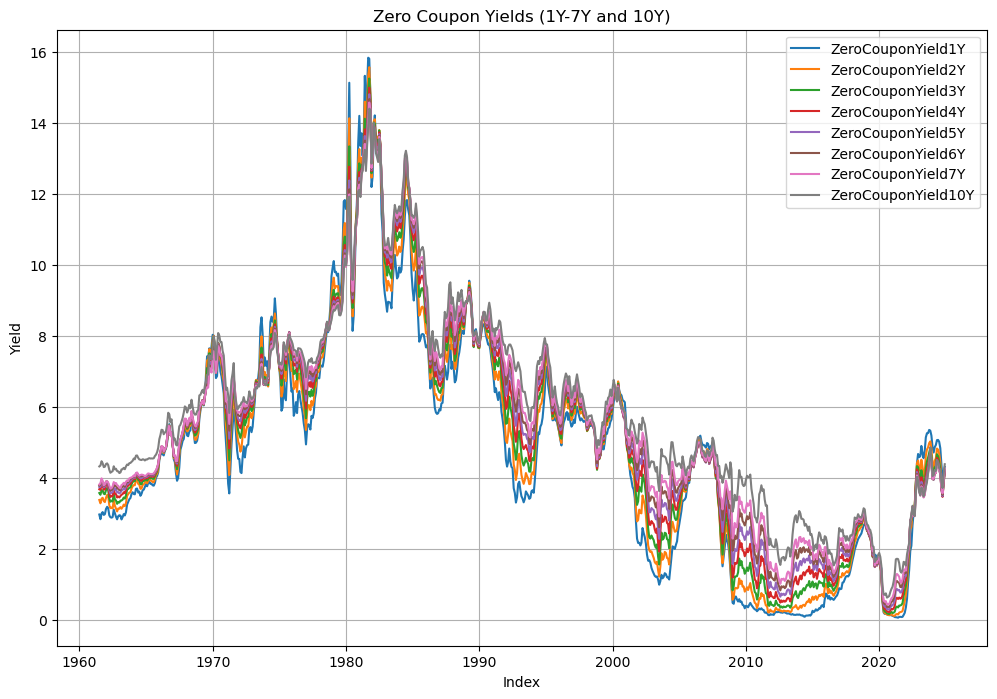

In [65]:
# Columns to plot
columns_to_plot = [
    'ZeroCouponYield1Y',
    'ZeroCouponYield2Y',
    'ZeroCouponYield3Y',
    'ZeroCouponYield4Y',
    'ZeroCouponYield5Y',
    'ZeroCouponYield6Y',
    'ZeroCouponYield7Y',
    'ZeroCouponYield10Y'
]


# Plot the columns
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    plt.plot(yield_data[col], label=col)

# Add labels, legend, and title
plt.xlabel('Index')
plt.ylabel('Yield')
plt.title('Zero Coupon Yields (1Y-7Y and 10Y)')
plt.legend()
plt.grid()
plt.show()


The grey line from 1960-1970 is the predicted past values

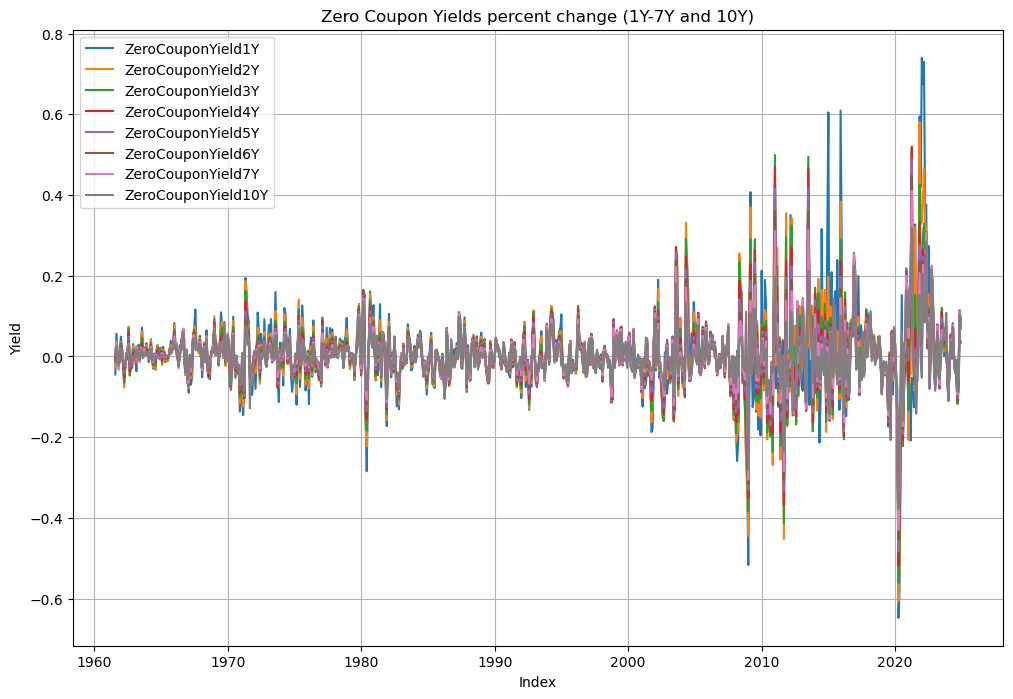

In [66]:
yield_data = yield_data.pct_change()
# Columns to plot
columns_to_plot = [
    'ZeroCouponYield1Y',
    'ZeroCouponYield2Y',
    'ZeroCouponYield3Y',
    'ZeroCouponYield4Y',
    'ZeroCouponYield5Y',
    'ZeroCouponYield6Y',
    'ZeroCouponYield7Y',
    'ZeroCouponYield10Y'
]


# Plot the columns
plt.figure(figsize=(12, 8))
for col in columns_to_plot:
    plt.plot(yield_data_diff[col], label=col)

# Add labels, legend, and title
plt.xlabel('Index')
plt.ylabel('Yield')
plt.title('Zero Coupon Yields percent change (1Y-7Y and 10Y)')
plt.legend()
plt.grid()
plt.show()


### Unemployment

C:\Users\devpa\AppData\Local\Temp\ipykernel_74480\923951865.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  unemployment = unemployment.resample('M').mean()


            overall_rate  men_rate  women_rate  men_16_17_rate  \
date                                                             
1948-01-31           3.4       3.4         3.3             9.7   
1948-02-29           3.8       3.6         4.5            13.0   
1948-03-31           4.0       3.8         4.4            14.0   
1948-04-30           3.9       3.8         4.3            11.6   
1948-05-31           3.5       3.5         3.7             7.1   

            women_16_17_rate  men_16_19_rate  women_16_19_rate  \
date                                                             
1948-01-31               8.8             9.4               7.2   
1948-02-29              13.2            10.8               8.9   
1948-03-31              11.4            11.9               8.6   
1948-04-30              10.6             9.8               9.2   
1948-05-31               5.4             7.6               6.1   

            men_18_19_rate  women_18_19_rate  men_16_24_rate  ...  \
date 

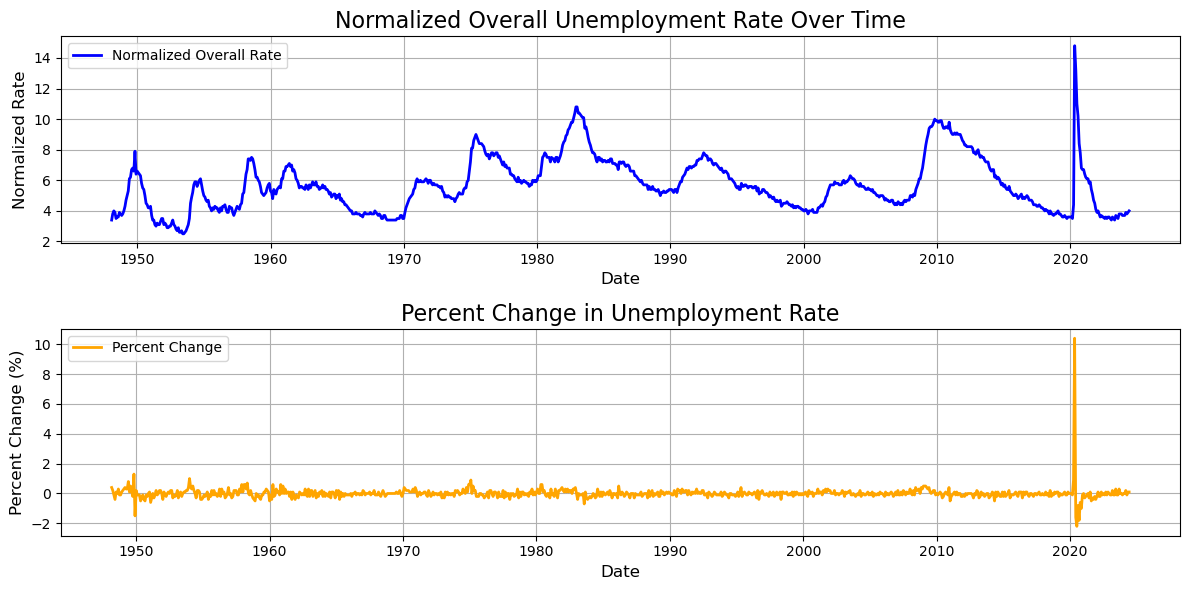

In [70]:

# Convert to datetime and set index
unemployment['date'] = pd.to_datetime(unemployment['date'], errors='coerce')
unemployment.set_index('date', inplace=True)
unemployment.sort_index(inplace=True)

# Resample to monthly frequency
unemployment = unemployment.resample('M').mean()

# Find and fill all missing data while dropping columns that don't meet the threshold
threshold = 0.2 * len(unemployment)
columns_to_drop = unemployment.columns[unemployment.isnull().sum() > threshold]
unemployment = unemployment.drop(columns=columns_to_drop)
unemployment.interpolate(method='linear', inplace=True)  # Use linear interpolation for filling NA values

# Calculate percent change for 'overall_rate'
unemployment['unemployment_percent_change'] = unemployment['overall_rate'].diff()

# Normalize 'overall_rate' using MinMaxScaler


# Display the first few rows
print(unemployment.head())

# Plot normalized overall rate
plt.figure(figsize=(12, 6))

# Original Unemployment Rate
plt.subplot(2, 1, 1)
plt.plot(unemployment.index, unemployment['overall_rate'], label='Normalized Overall Rate', color='blue', linewidth=2)
plt.title('Normalized Overall Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Rate', fontsize=12)
plt.legend()
plt.grid(True)

# Percent Change
plt.subplot(2, 1, 2)
plt.plot(unemployment.index, unemployment['unemployment_percent_change'], label='Percent Change', color='orange', linewidth=2)
plt.title('Percent Change in Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percent Change (%)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [71]:
unemployment = unemployment["unemployment_percent_change"]

### Inflation

            value  inflation_percent_change
date                                       
1947-02-28  21.62                  0.006518
1947-03-31  22.00                  0.017576
1947-04-30  22.00                  0.000000
1947-05-31  21.95                 -0.002273
1947-06-30  22.08                  0.005923


C:\Users\devpa\AppData\Local\Temp\ipykernel_74480\4002626435.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  inflation = inflation.resample('M').mean()


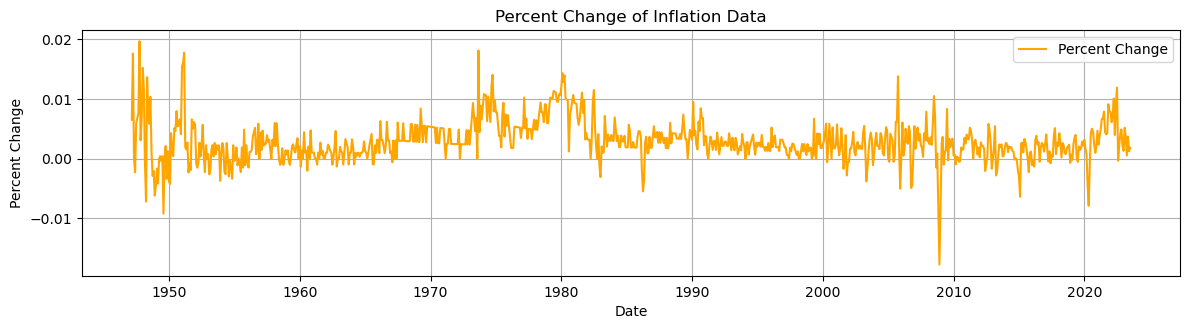

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is set as index
inflation['date'] = pd.to_datetime(inflation['date'], errors='coerce')
inflation.set_index('date', inplace=True)
inflation.sort_index(inplace=True)

# Resample to ensure monthly frequency
inflation = inflation.resample('M').mean()

# Fill missing values using linear interpolation
inflation.interpolate(method='linear', inplace=True)

# Calculate the percent change
inflation['inflation_percent_change'] = inflation['value'].pct_change() 

# Drop NaN values resulting from percent change calculation
inflation = inflation.dropna(subset=['inflation_percent_change'])

print(inflation.head())

# Plot the normalized original data and percent change
plt.figure(figsize=(12, 6))

# Percent Change Data
plt.subplot(2, 1, 2)
plt.plot(inflation.index, inflation['inflation_percent_change'], label='Percent Change', color='orange')
plt.title('Percent Change of Inflation Data')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### GDP

C:\Users\devpa\AppData\Local\Temp\ipykernel_74480\3248638055.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gdp = gdp.resample('M').mean()


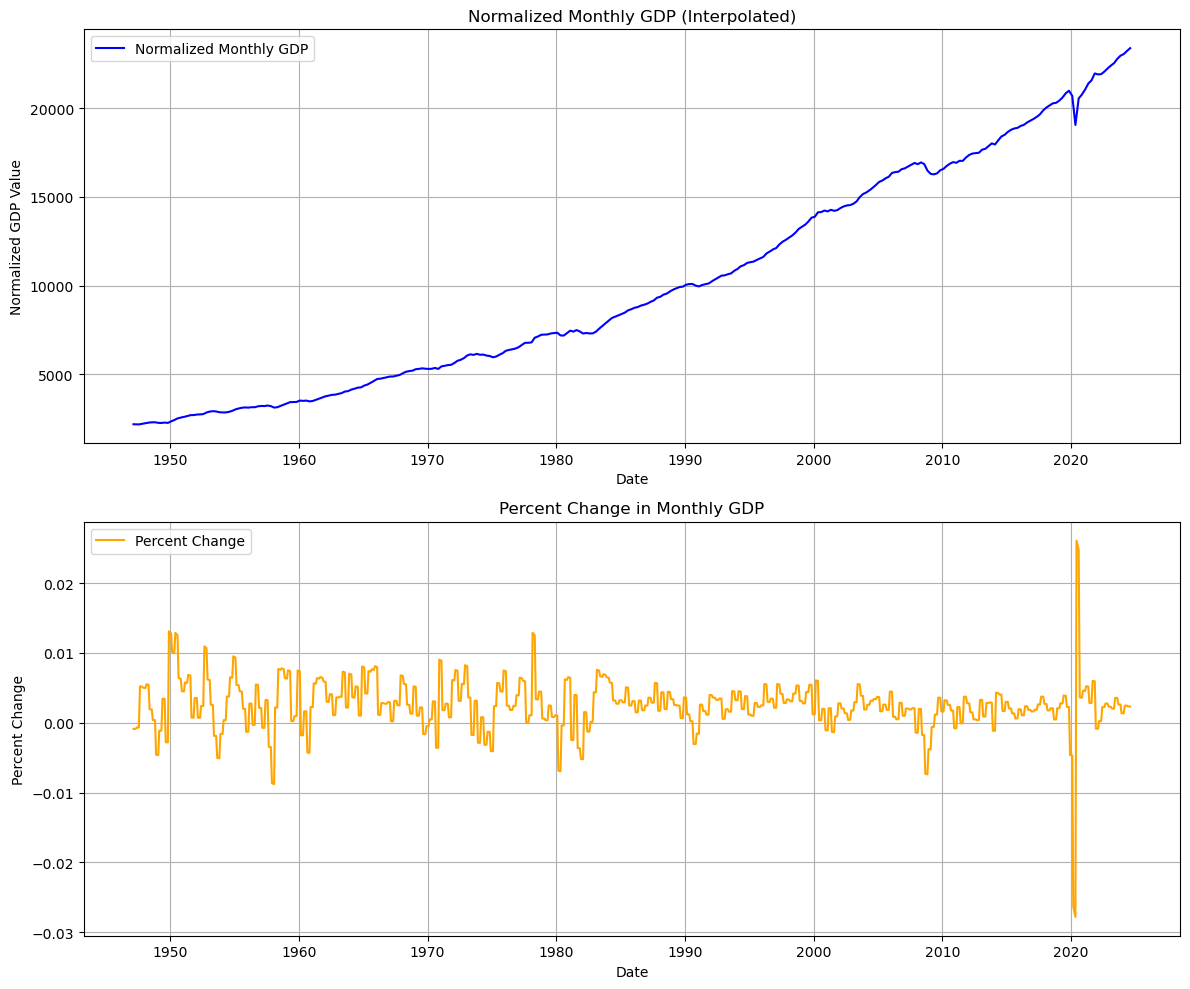

In [74]:
# Convert DATE to datetime and set as index
gdp = pd.read_csv('data/gdp.csv')
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp.set_index('DATE', inplace=True)

# Resample to monthly frequency
gdp = gdp.resample('M').mean()
gdp = gdp.interpolate(method='linear')

# Calculate percent change
gdp['gdp_percent_change'] = gdp['GDPC1'].pct_change() 

# Drop NaN values from percent change
gdp = gdp.dropna(subset=['gdp_percent_change'])

# Visualization
plt.figure(figsize=(12, 10))

# Monthly GDP (Normalized)
plt.subplot(2, 1, 1)
plt.plot(gdp.index, gdp['GDPC1'], label='Normalized Monthly GDP', color='blue')
plt.title('Normalized Monthly GDP (Interpolated)')
plt.xlabel('Date')
plt.ylabel('Normalized GDP Value')
plt.legend()
plt.grid(True)

# Percent Change in GDP
plt.subplot(2, 1, 2)
plt.plot(gdp.index, gdp['gdp_percent_change'], label='Percent Change', color='orange')
plt.title('Percent Change in Monthly GDP')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Data Date Range

In [75]:
import pandas as pd

# GDP Dataset
print("GDP Dataset:")
gdp.index = pd.to_datetime(gdp.index, errors='coerce')  
print("GDP Index Type:", gdp.index.dtype)
print("GDP Date Range:", gdp.index.min(), "to", gdp.index.max())

# Inflation Dataset
print("\nInflation Dataset:")
inflation['date'] = pd.to_datetime(inflation.index, errors='coerce')  
inflation.set_index('date', inplace=True)  
print("Inflation Index Type:", inflation.index.dtype)
print("Inflation Date Range:", inflation.index.min(), "to", inflation.index.max())

# Unemployment Dataset
print("\nUnemployment Dataset:")
unemployment['date'] = pd.to_datetime(unemployment.index, errors='coerce')  
unemployment.set_index('date', inplace=True)  
print("Unemployment Index Type:", unemployment.index.dtype)
print("Unemployment Date Range:", unemployment.index.min(), "to", unemployment.index.max())

# Yield Curve Dataset
print("\nYield Curve Dataset:")
yield_data['Date'] = pd.to_datetime(yield_data.index, errors='coerce')  
yield_data.set_index('Date', inplace=True)  
print("Yield Curve Index Type:", yield_data.index.dtype)
print("Yield Curve Date Range:", yield_data.index.min(), "to", yield_data.index.max())


GDP Dataset:
GDP Index Type: datetime64[ns]
GDP Date Range: 1947-02-28 00:00:00 to 2024-07-31 00:00:00

Inflation Dataset:
Inflation Index Type: datetime64[ns]
Inflation Date Range: 1947-02-28 00:00:00 to 2023-06-30 00:00:00

Unemployment Dataset:


AttributeError: 'Series' object has no attribute 'set_index'

### Align and Merge Datasets

In [60]:
yield_data_diff

,Slope,LongTermRate,ZeroCouponYield1Y,ZeroCouponYield2Y,ZeroCouponYield3Y,ZeroCouponYield4Y,ZeroCouponYield5Y,ZeroCouponYield6Y,ZeroCouponYield7Y,ZeroCouponYield8Y,...,InstantaneousForwardRate1Y,InstantaneousForwardRate2Y,InstantaneousForwardRate3Y,InstantaneousForwardRate4Y,InstantaneousForwardRate5Y,InstantaneousForwardRate6Y,InstantaneousForwardRate7Y,InstantaneousForwardRate8Y,InstantaneousForwardRate9Y,InstantaneousForwardRate10Y
Date,,,,,,,,,,,,,,,,,,,,,
1961-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-07-31,0.551323,0.024504,-0.044620,-0.027720,-0.013684,-0.004386,0.001568,0.005563,0.008384,NaN,...,-0.027437,0.000104,0.017356,0.022662,0.024042,0.024389,0.024473,NaN,NaN,0.022495
1961-08-31,-0.129644,0.035976,0.056193,0.039728,0.037046,0.036492,0.036335,0.036263,0.036215,NaN,...,0.025082,0.030353,0.034301,0.035552,0.035882,0.035954,0.035971,NaN,NaN,0.029485
1961-09-30,-0.012069,-0.027796,0.013840,0.007182,-0.001982,-0.008253,-0.012325,-0.015054,-0.016980,NaN,...,0.016619,-0.009963,-0.022147,-0.026190,-0.027372,-0.027683,-0.027766,NaN,NaN,-0.025164
1961-10-31,-0.049836,-0.076212,-0.026376,-0.027305,-0.025987,-0.025475,-0.026787,-0.029381,-0.032576,NaN,...,-0.025668,-0.026432,-0.022426,-0.027070,-0.036439,-0.046300,-0.054721,NaN,NaN,-0.034694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31,-0.185984,0.452468,-0.036191,-0.048491,-0.048090,-0.042262,-0.034738,-0.027333,-0.020823,-0.015426,...,-0.060816,-0.058243,-0.034699,-0.010992,0.006001,0.016004,0.020776,0.022249,0.021871,0.020642
2024-08-31,-0.632990,0.831523,-0.096083,-0.118003,-0.116287,-0.109443,-0.103102,-0.098282,-0.094736,-0.092026,...,-0.147633,-0.130066,-0.096596,-0.079709,-0.074608,-0.074026,-0.074229,-0.073932,-0.072860,-0.071083
2024-09-30,-0.275639,0.066861,-0.088224,-0.087101,-0.072504,-0.061272,-0.054060,-0.049245,-0.045694,-0.042851,...,-0.114521,-0.055917,-0.028175,-0.024334,-0.025517,-0.025937,-0.025158,-0.023842,-0.022503,-0.021406


In [55]:
# Align the date range to the common period
common_start_date = max(
    gdp.index.min(),
    inflation.index.min(),
    unemployment.index.min(),
    yield_data.index.min()
)
common_end_date = min(
    gdp.index.max(),
    inflation.index.max(),
    unemployment.index.max(),
    yield_data.index.max()
)

# Clip datasets to the common date range
gdp_aligned = gdp.loc[common_start_date:common_end_date, ['gdp_percent_change']]
inflation_aligned = inflation.loc[common_start_date:common_end_date, ['inflation_percent_change']]
unemployment_aligned = unemployment.loc[common_start_date:common_end_date, ['unemployment_percent_change']]
yield_curve_aligned = yield_data.loc[common_start_date:common_end_date, ['LongTermRate', 'Slope']]

# Merge datasets
merged_data = (
    gdp
    .merge(inflation, left_index=True, right_index=True, how='inner')
    .merge(unemployment, left_index=True, right_index=True, how='inner')
    .merge(yield_data_diff, left_index=True, right_index=True, how='inner')
)

# Display the merged data
print("Merged Data Summary:")
print(merged_data.info())
print(merged_data.head())

output_path = 'data/merged_data.csv'  
merged_data.to_csv(output_path)


Merged Data Summary:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 1961-06-30 to 2023-06-30
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GDPC1                        745 non-null    float64
 1   gdp_percent_change           745 non-null    float64
 2   value                        745 non-null    float64
 3   inflation_percent_change     745 non-null    float64
 4   overall_rate                 745 non-null    float64
 5   men_rate                     745 non-null    float64
 6   women_rate                   745 non-null    float64
 7   men_16_17_rate               745 non-null    float64
 8   women_16_17_rate             745 non-null    float64
 9   men_16_19_rate               745 non-null    float64
 10  women_16_19_rate             745 non-null    float64
 11  men_18_19_rate               745 non-null    float64
 12  women_18_19_rate             745 non-n

In [56]:
data = pd.read_csv("data/merged_data.csv")

In [57]:
data

,Unnamed: 0,GDPC1,gdp_percent_change,value,inflation_percent_change,overall_rate,men_rate,women_rate,men_16_17_rate,women_16_17_rate,...,InstantaneousForwardRate1Y,InstantaneousForwardRate2Y,InstantaneousForwardRate3Y,InstantaneousForwardRate4Y,InstantaneousForwardRate5Y,InstantaneousForwardRate6Y,InstantaneousForwardRate7Y,InstantaneousForwardRate8Y,InstantaneousForwardRate9Y,InstantaneousForwardRate10Y
0,1961-06-30,3598.508333,0.006361,29.840,0.000000,6.9,6.5,7.6,17.6,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961-07-31,3621.252000,0.006320,29.920,0.002681,7.0,6.6,7.7,18.5,19.7,...,-0.027437,0.000104,0.017356,0.022662,0.024042,0.024389,0.024473,NaN,NaN,0.022495
2,1961-08-31,3644.931000,0.006539,29.940,0.000668,6.6,6.4,7.0,18.2,19.5,...,0.025082,0.030353,0.034301,0.035552,0.035882,0.035954,0.035971,NaN,NaN,0.029485
3,1961-09-30,3668.610000,0.006496,29.980,0.001336,6.7,6.3,7.3,19.6,19.8,...,0.016619,-0.009963,-0.022147,-0.026190,-0.027372,-0.027683,-0.027766,NaN,NaN,-0.025164
4,1961-10-31,3692.289000,0.006454,29.980,0.000000,6.5,6.1,7.2,18.6,18.6,...,-0.025668,-0.026432,-0.022426,-0.027070,-0.036439,-0.046300,-0.054721,NaN,NaN,-0.034694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2023-02-28,22448.762667,0.002023,301.648,0.003700,3.6,3.6,3.5,11.4,6.9,...,0.101504,0.081369,0.085243,0.086775,0.078614,0.064824,0.049854,0.036216,0.024890,0.015997
741,2023-03-31,22494.090333,0.002019,301.808,0.000530,3.5,3.6,3.4,9.7,8.9,...,-0.050070,-0.032902,-0.011135,0.004660,0.011807,0.011895,0.007619,0.001305,-0.005431,-0.011537
742,2023-04-30,22539.418000,0.002015,302.918,0.003678,3.4,3.5,3.4,8.8,10.4,...,-0.102393,-0.109199,-0.099247,-0.082163,-0.063550,-0.047473,-0.035163,-0.026279,-0.019993,-0.015515
743,2023-05-31,22619.923000,0.003572,303.294,0.001241,3.7,3.7,3.6,8.3,10.9,...,0.019393,-0.005957,-0.004380,0.010757,0.028368,0.043487,0.054789,0.062438,0.067086,0.069409
